Question 1: Given some sample data, write a program to answer the following: 

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.


a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 


In [3]:
import pandas as pd
df = pd.read_excel(r'2019 Winter Data Science Intern Challenge Data Set.xlsx')

In [4]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [8]:
df["order_amount"].mean()


3145.128

so the given AOV is the mean of "order_amount".

In [13]:
shop_dict = {}

for index, row in df.iterrows():
    if row["shop_id"] not in shop_dict:
        shop_dict[row["shop_id"]] = [row["order_amount"], row["total_items"]]
    else:
        shop_dict[row["shop_id"]][0] += row["order_amount"]
        shop_dict[row["shop_id"]][1] += row["total_items"]

AOV = Σ(indiviual order amount/indiviual total items for each shop)/n
      where n = total no.of shops

In [17]:
item_price = []
shop_id = []
for key, value in shop_dict.items():
    item_price.append(value[0]/value[1])
    shop_id.append(key)
    
sum(item_price)/len(item_price)

407.99

b.What metric would you report for this dataset?

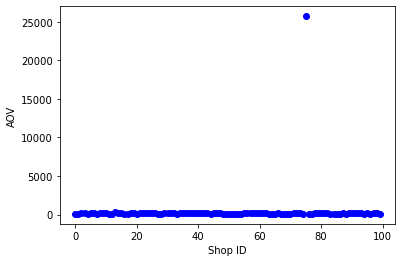

In [18]:
import matplotlib.pyplot as plt
plt.plot(item_price, 'bo')
plt.xlabel("Shop ID")
plt.ylabel("AOV")
plt.show()

### outlier is present
#### so mean value will gives only false result
###  prefer to go with either median or mode, which minimises the effect of outliers.

c.What is its value?

In [19]:
import statistics
statistics.median(item_price)

153.0

## question 2

a) How many orders were shipped by Speedy Express in total?


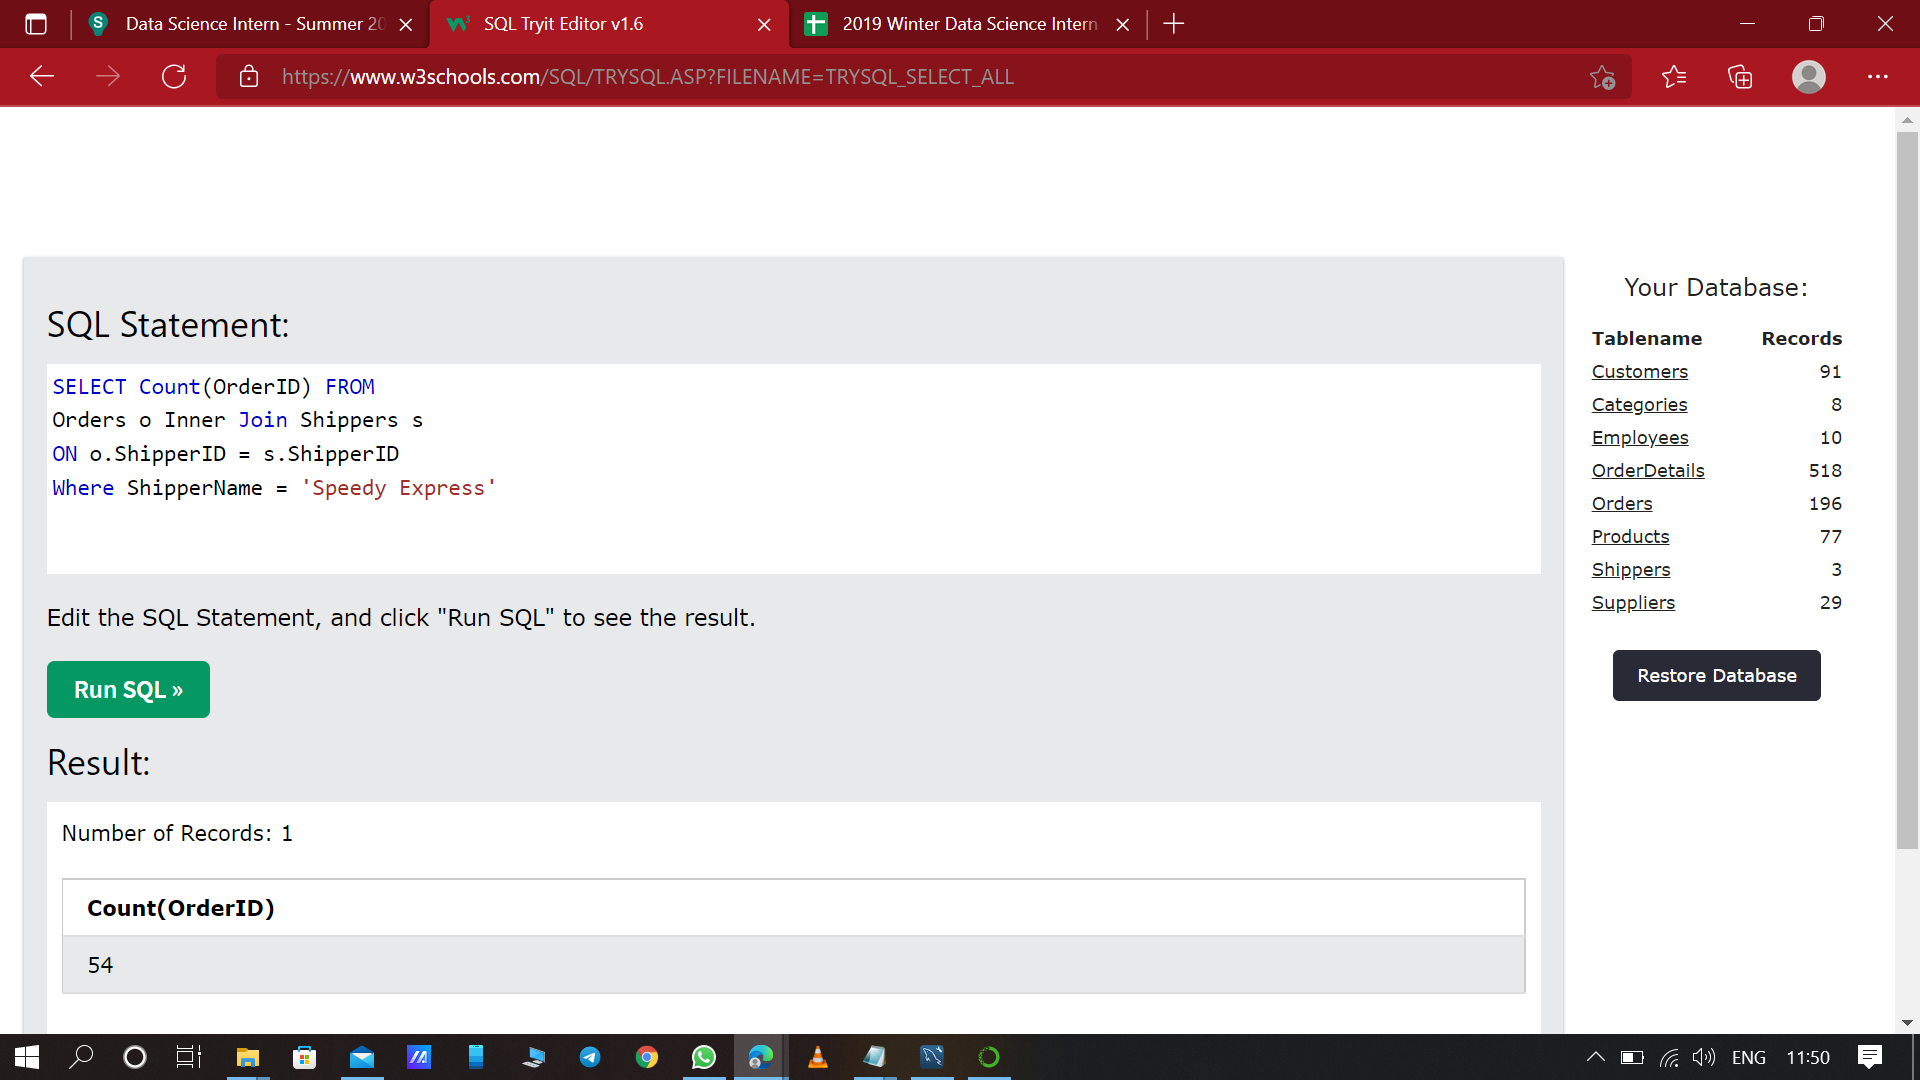

b) What is the last name of the employee with the most orders?

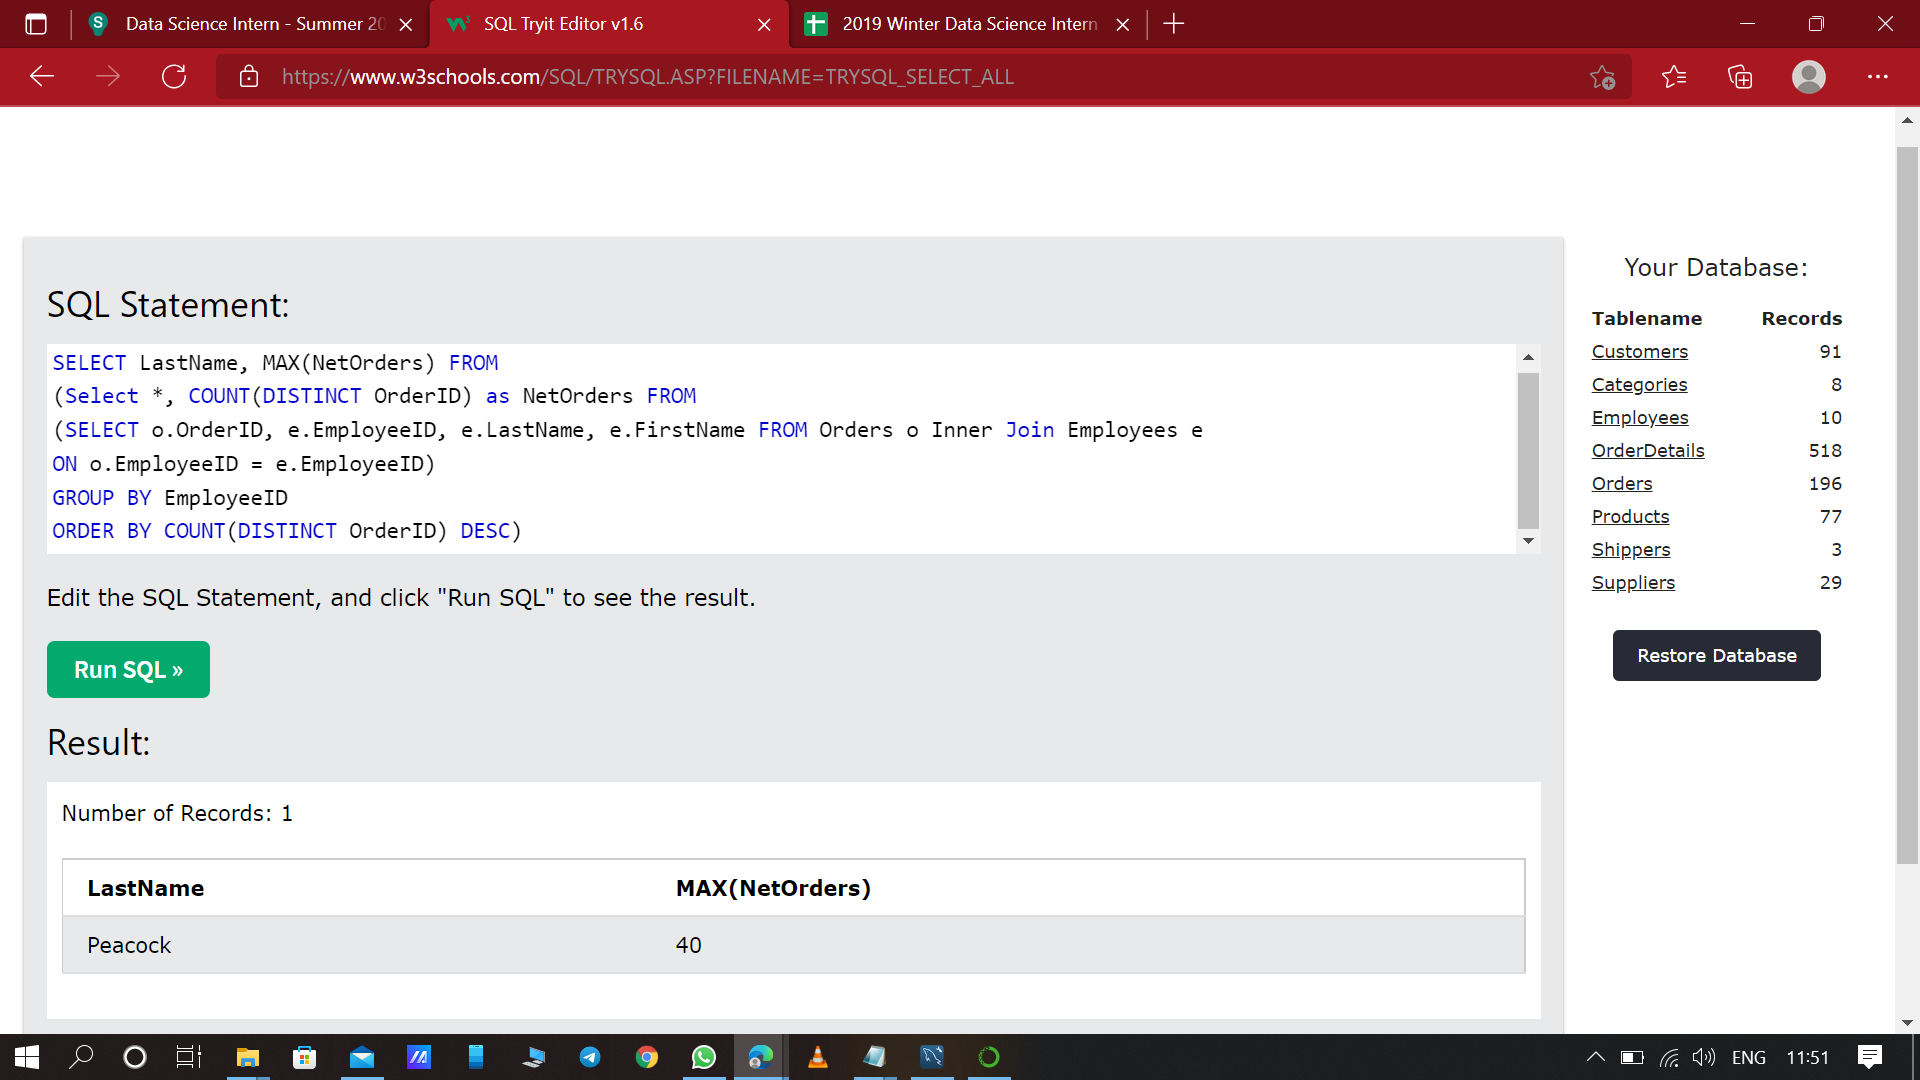

c) What product was ordered the most by customers in Germany?

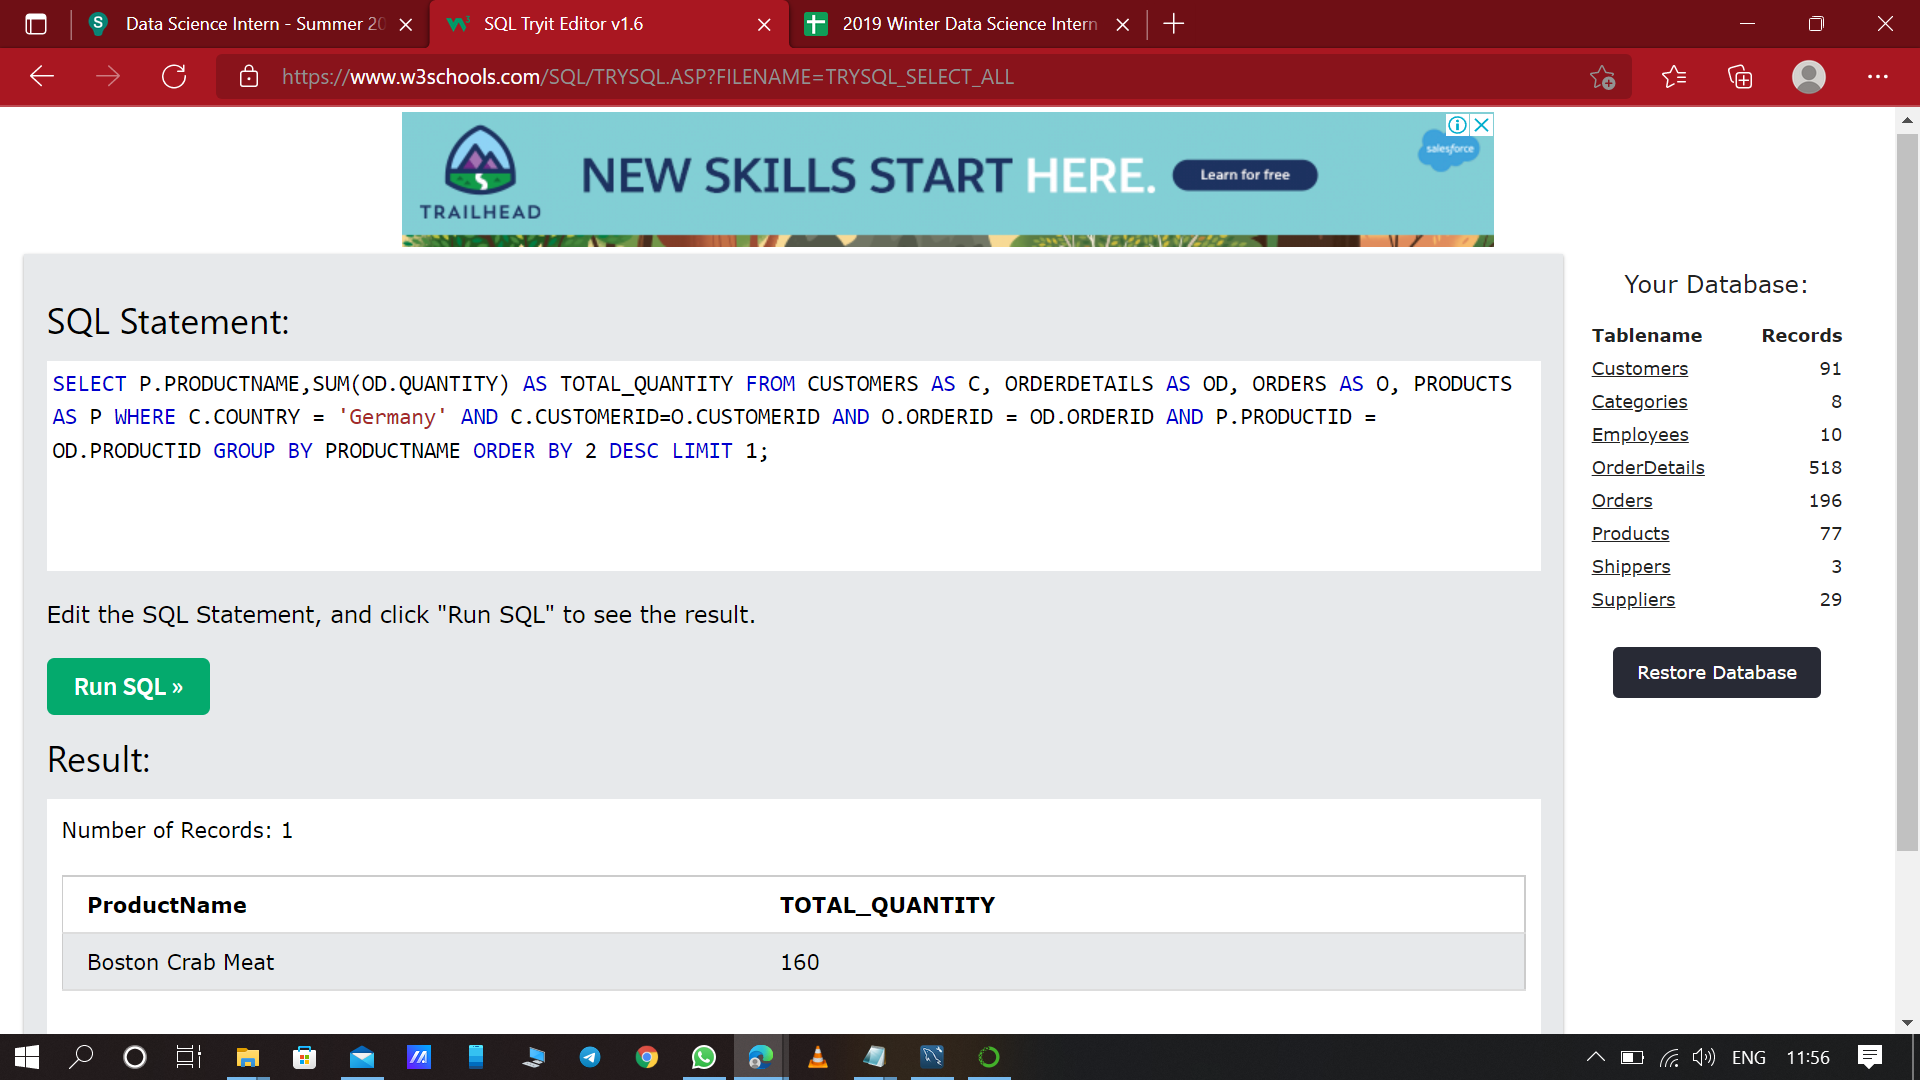